# Ева Матвеева. Визуализация.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(11914, 16)

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Переведём в понятные единицы измерения.

In [5]:
data['highway l/km'] = round(235.214583 / data['highway MPG'], 2)
data['city l/km'] = round(235.214583 / data['city mpg'], 2)
data.drop(columns=['highway MPG', 'city mpg'], inplace=True)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Popularity,MSRP,highway l/km,city l/km
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,3916,46135,9.05,12.38
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,3916,40650,8.40,12.38
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,3916,36350,8.40,11.76
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,3916,29450,8.40,13.07
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,3916,34500,8.40,13.07


Сделаем некоторые значения категориальными (количество цилиндров, год, количество дверей)

In [6]:
data[['Year', 'Engine Cylinders', 'Number of Doors']] = data[['Year', 'Engine Cylinders', 'Number of Doors']].astype('category')

In [7]:
data[['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'Number of Doors', 'Engine Cylinders', 'Year']].describe()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,Number of Doors,Engine Cylinders,Year
count,11914,11914,11911,11914,11914,8172,11914,11914,11908.0,11884.0,11914
unique,48,915,10,5,4,71,3,16,3.0,9.0,28
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan,4.0,4.0,2015
freq,1123,156,7172,8266,4787,1110,4764,3048,8353.0,4752.0,2170


### Посмотрим на числовые признаки

#### Мощность

Text(0.5, 1.0, 'Распредедление мощности автомобилей в л. с. ')

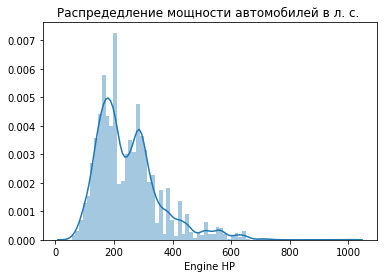

In [8]:
sns.distplot(data['Engine HP'].dropna(), bins=73).set_title('Распредедление мощности автомобилей в л. с. ')

Интересно, что на графике распределений лошадиных сил два пика и просадка в районе 250 л. с. Вероятно, это связано с налогообложением в зависимости от мощности автомобиля. 

#### MSRP

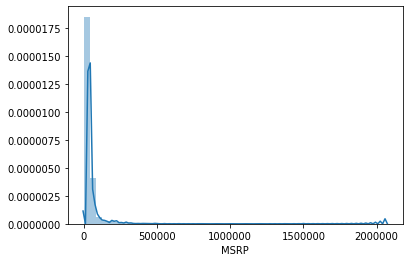

In [9]:
sns.distplot(data['MSRP'])

Text(0.5, 1.0, 'Распредедление рекомендованной цены производителя')

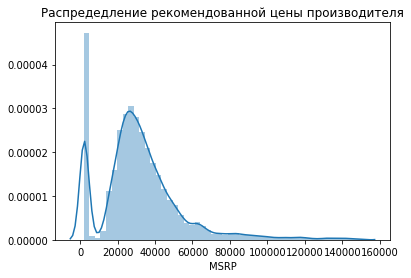

In [10]:
sns.distplot(data[data['MSRP']<150000]['MSRP']).set_title('Распредедление рекомендованной цены производителя')

Распределение для MSRP (не для всех, а для меньших 150000, так как иначе картинка получается неинформативной)<br>
(MSRP - рекомендованная цена производителя)<br>
Заметно, что рядом с нулём есть всплеск, рассмотрим его.   

Text(0.5, 1.0, 'Распредедление рекомендованной цены производителя')

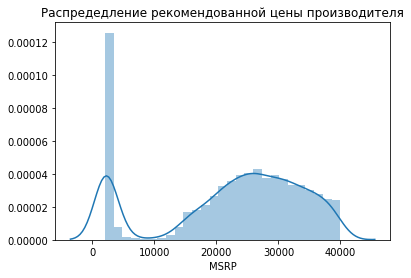

In [11]:
sns.distplot(data[data['MSRP']<40000]['MSRP']).set_title('Распредедление рекомендованной цены производителя')

In [12]:
data['MSRP'].value_counts()

2000     1036
25995      19
29995      19
20995      16
27995      16
         ... 
27825       1
56495       1
3245        1
99500       1
4098        1
Name: MSRP, Length: 6049, dtype: int64

In [13]:
data[data['MSRP'] == 2000]['Year'].value_counts()

1993    171
1992    161
1991    137
1994    134
1990    117
1995     91
1996     90
1997     68
1998     32
1999     20
2000     15
2016      0
2001      0
2002      0
2017      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2003      0
Name: Year, dtype: int64

Возможно, 2000 - это какой-то минимум для цены. Только машины до 2000-го года оценивают этим минимумом.

#### Популярность

Text(0.5, 1.0, 'Распредедление популярности')

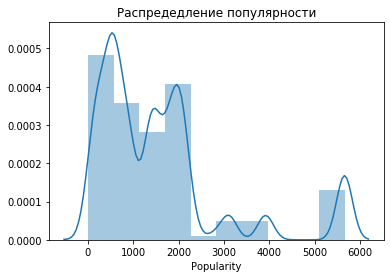

In [14]:
sns.distplot(data['Popularity'], bins=10).set_title('Распредедление популярности')

#### Расход топлива

Text(0.5, 0.98, 'Распределение расхода топлива на 100 км в городе и на трассе')

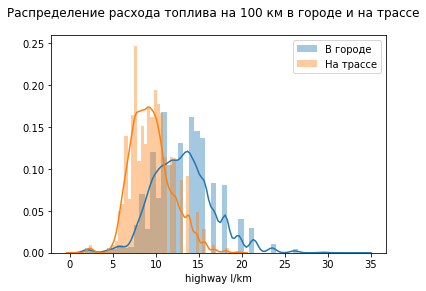

In [15]:
sns.distplot(data['city l/km'], label='В городе')
sns.distplot(data['highway l/km'], label='На трассе')
plt.legend()
plt.suptitle('Распределение расхода топлива на 100 км в городе и на трассе')

### Посмотрим на категориальные признаки

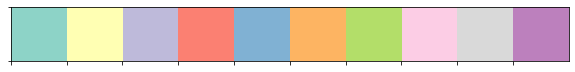

In [16]:
sns.set(style='whitegrid')

#### Количество цилиндров

Text(0.5, 0.98, 'Количество цилиндров')

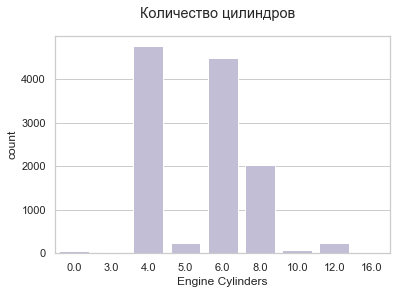

In [17]:
sns.countplot(data['Engine Cylinders'], color=qualitative_colors[2])
plt.suptitle('Количество цилиндров')

#### Количество дверей

Text(0.5, 0.98, 'Количество дверей')

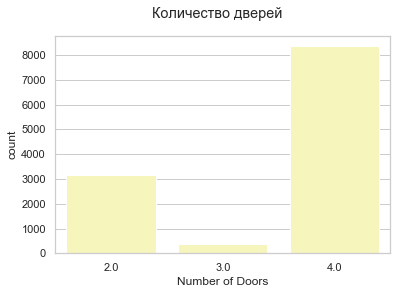

In [18]:
sns.countplot(data['Number of Doors'], color=qualitative_colors[1])
plt.suptitle('Количество дверей')

#### Тип трансмиссии

Text(0.5, 0.98, 'Трансмиссия')

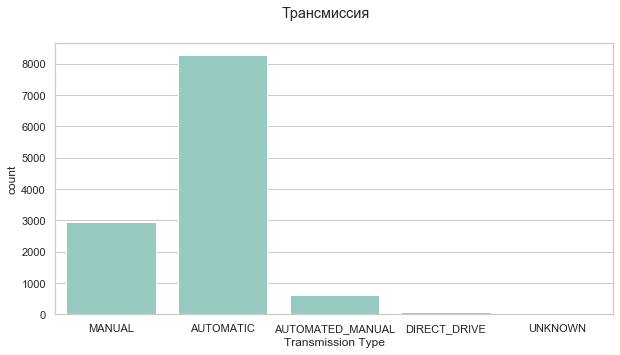

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data['Transmission Type'], color=qualitative_colors[0], ax=ax)
plt.suptitle('Трансмиссия')

Неудивительно, что трансмиссий типа Direct Drive так немного, ведь это новая разработка. А автоматических коробок больше всего, они сейчас самые популярные. <br>
Видно, что есть пропуски в данных. 

#### Тип ТС

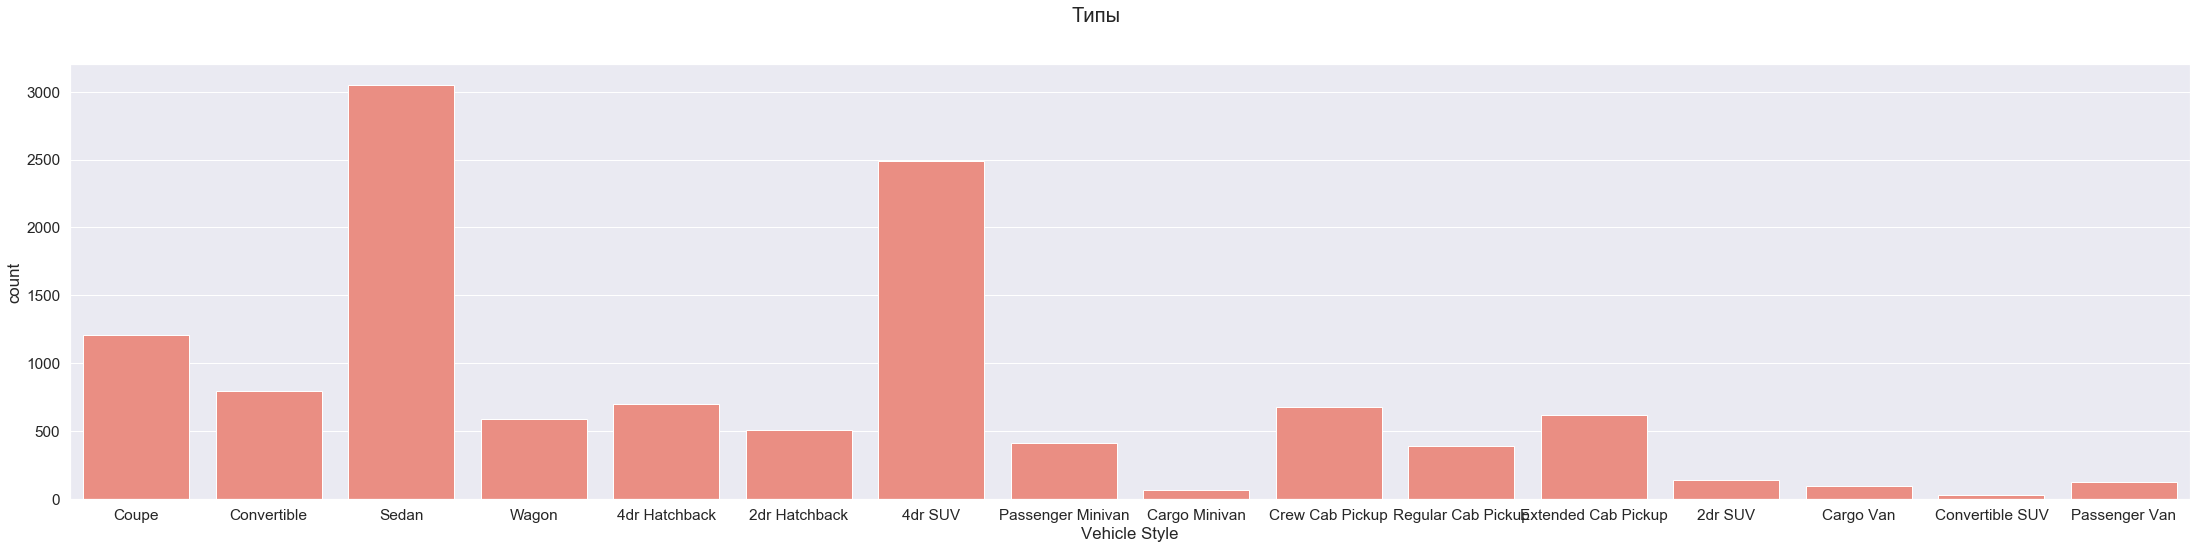

In [47]:
sns.set()
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(38, 8))
sns.countplot(data['Vehicle Style'], color=qualitative_colors[3], ax=ax)
plt.suptitle('Типы')
sns.set()

#### Размер ТС

Text(0.5, 0.98, 'Размеры')

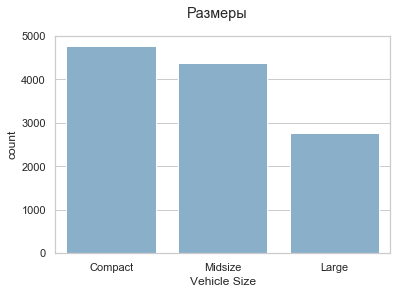

In [21]:
sns.countplot(data['Vehicle Size'], color=qualitative_colors[4])
plt.suptitle('Размеры')

#### Ведущие колёса

Text(0.5, 0.98, 'Ведущие колёса')

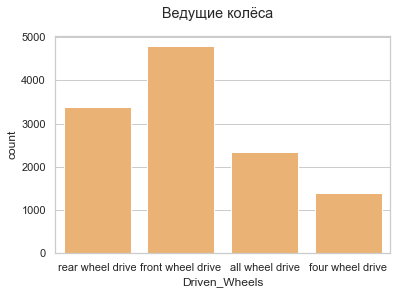

In [22]:
splot = sns.countplot(data['Driven_Wheels'], color=qualitative_colors[5])
plt.suptitle('Ведущие колёса')

Четыре ведущих колеса = все колёса ведущие. Можем подправить датасет. 

In [23]:
data['Driven_Wheels'] = data['Driven_Wheels'].apply(lambda x: 'all wheel drive' if x == 'four wheel drive' else x).astype('category')

Text(0.5, 0.98, 'Ведущие колёса')

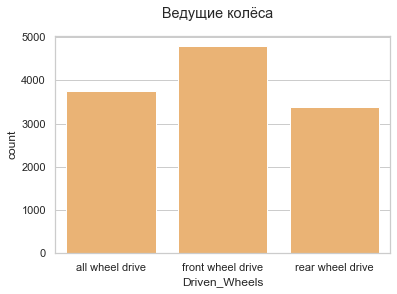

In [24]:
sns.countplot(data['Driven_Wheels'], color=qualitative_colors[5])
plt.suptitle('Ведущие колёса')

#### Тип топлива

In [25]:
data['Engine Fuel Type'].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

#### Посмотрим табличку с производителями. Их слишком много для гистограмы. 

In [26]:
data['Make'].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis   

### Посмотрим зависимости между некоторыми признаками

In [27]:
sns.set()

#### Зависимость мощности от количества цилиндров

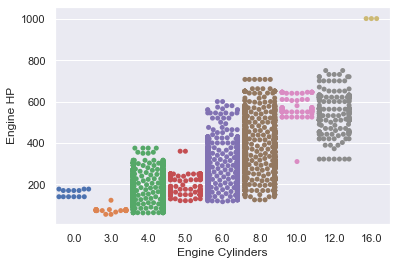

In [28]:
sns.swarmplot(data['Engine Cylinders'], data['Engine HP'])

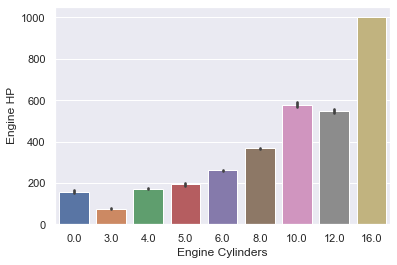

In [29]:
sns.barplot(data['Engine Cylinders'], data['Engine HP'])

В целом, чем больше цилиндров, тем больше мощность автомобиля.<br>
0 цилиндров скорее всвего соответствует электрическим автомобилям. Проверим это:

In [30]:
len(data[(data['Engine Cylinders'] == 0) & (data['Engine Fuel Type'] != 'electric')])

0

Так и есть!

#### Зависимость MSRP от мощности

Text(0.5, 0.98, 'Зависимость MSRP от мощности')

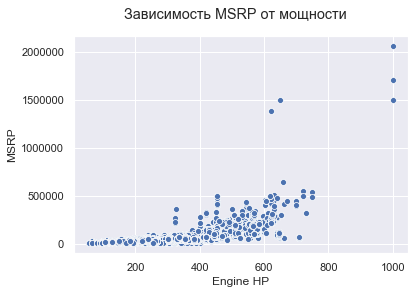

In [32]:
sns.scatterplot(data['Engine HP'], data['MSRP'])
plt.suptitle('Зависимость MSRP от мощности')

Видно, что есть несколько очень дорогих и очень мощных автомобилей. И несколько не таких мощных, но всё равно дорогих. Посмотрим, что это за машины. 

In [33]:
data[data['MSRP'] > 1000000]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Popularity,MSRP,highway l/km,city l/km
6350,Maybach,Landaulet,2011,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Convertible,67,1380000,14.7,23.52
6351,Maybach,Landaulet,2012,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,Performance",Large,Convertible,67,1382750,14.7,23.52
8486,Lamborghini,Reventon,2008,premium unleaded (required),650.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,1158,1500000,16.8,26.13
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,820,2065902,16.8,29.40
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,820,1500000,16.8,29.40
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,820,1705769,16.8,29.40


Обрежем по MSRP, чтобы было лучше видно. 

Text(0.5, 0.98, 'Зависимость MSRP от мощности')

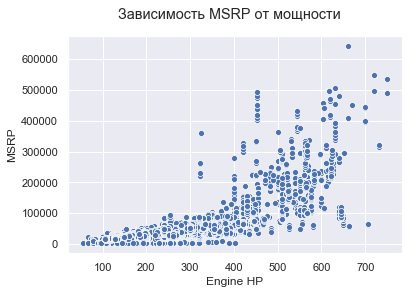

In [34]:
sns.scatterplot(data[data['MSRP'] < 900000]['Engine HP'], data[data['MSRP'] < 900000]['MSRP'])
plt.suptitle('Зависимость MSRP от мощности')

Заменто, что при одинаковой мощности цена может очень отличаться. Видны даже вертикальные линии. 
Общая тенденция - больше мощность - больше цена. 

#### Зависимость MSRP от размера

Swarmplot для зависимости MSRP от размера работал очень долго. Построим вместо него barplot. Он, конечно, не даст полной картины, но общая закономерность будет видна. 

Text(0.5, 0.98, 'Зависимость MSRP от размера')

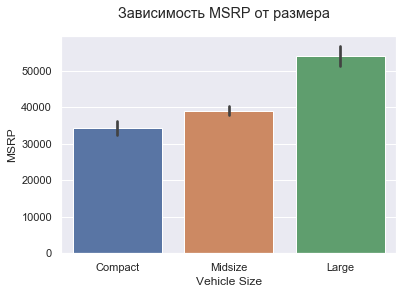

In [36]:
sns.barplot(data['Vehicle Size'], data['MSRP'])
plt.suptitle('Зависимость MSRP от размера')

В среднем, чем машина больше, тем она дороже. 

#### Зависимость MSRP от производителя

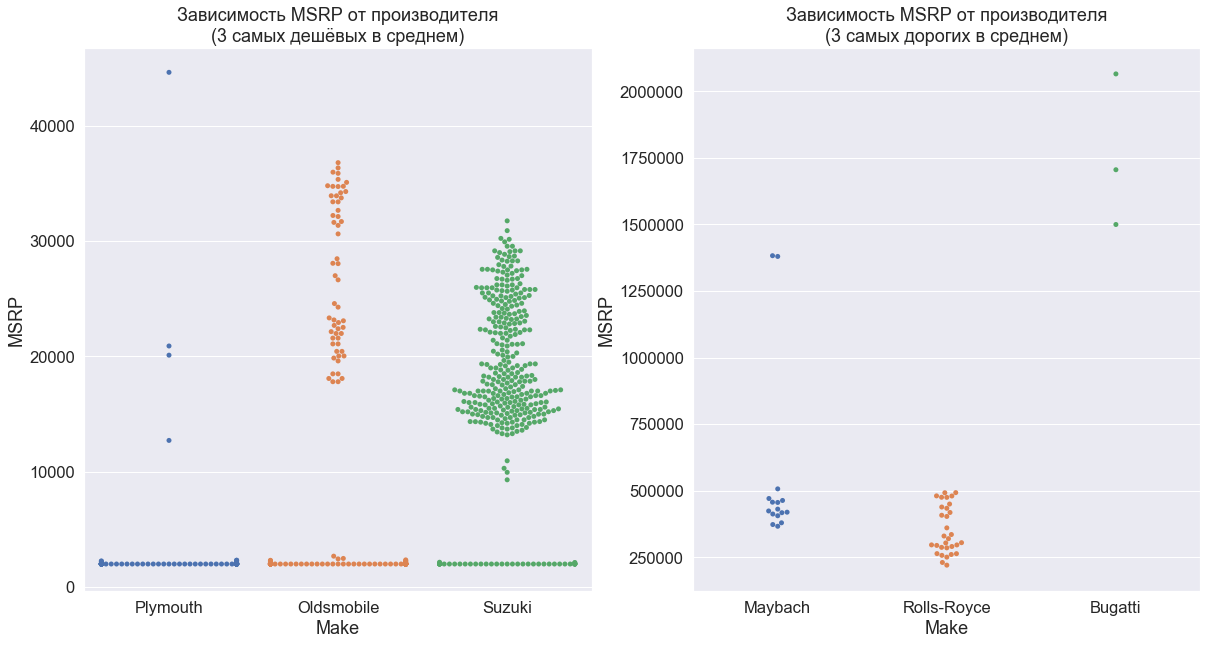

In [37]:
sns.set()
a = data.groupby(['Make'])['MSRP'].mean().sort_values()
Maker_cheap = list(a[:3].index)
Maker_expensive = list(a[-3:].index)
sns.set(font_scale=1.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.swarmplot(data[data['Make'].isin(Maker_cheap)]['Make'], data[data['Make'].isin(Maker_cheap)]['MSRP'], ax=ax1)
sns.swarmplot(data[data['Make'].isin(Maker_expensive)]['Make'], data[data['Make'].isin(Maker_expensive)]['MSRP'], ax=ax2)
ax1.set_title('Зависимость MSRP от производителя\n(3 самых дешёвых в среднем)')
ax2.set_title('Зависимость MSRP от производителя\n(3 самых дорогих в среднем)')
sns.set()

#### Зависимость расхода от мощности

Text(0.5, 0.98, 'Зависимость расхода в городе от мощности')

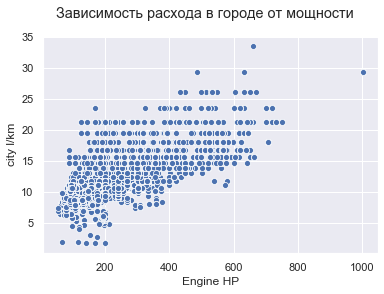

In [38]:
sns.scatterplot(data['Engine HP'], data['city l/km'])
plt.suptitle('Зависимость расхода в городе от мощности')

Text(0.5, 0.98, 'Зависимость расхода на трассе от мощности')

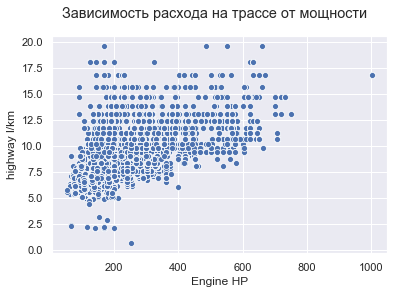

In [39]:
sns.scatterplot(data['Engine HP'], data['highway l/km'])
plt.suptitle('Зависимость расхода на трассе от мощности')

Text(0.5, 0.98, 'Зависимость расхода от мощности')

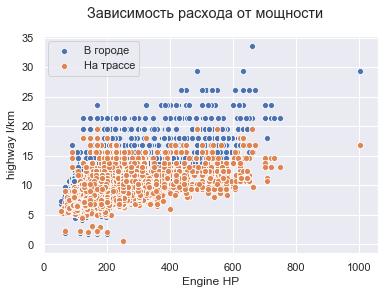

In [40]:
sns.scatterplot(data['Engine HP'], data['city l/km'], label='В городе')
sns.scatterplot(data['Engine HP'], data['highway l/km'], label='На трассе')
plt.legend()
plt.suptitle('Зависимость расхода от мощности')

Видны горизонтальные линии. Я думала, что расход будет коррелировать с мощностью, на деле связь не так уж видна. 